In [ ]:
from transformers import BertTokenizer, BertModel
import torch

# Φορτώνουμε το μοντέλο BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertModel.from_pretrained("bert-base-uncased")
model.eval()

text1_versions = {
    "original": "Today is our dragon boat festival, in our Chinese culture, to celebrate it with all safe and great in our lives. Hope you too, to enjoy it as my deepest wishes. Thank your message to show our words to  the doctor, as his next contract checking, to all of us. I got this message to see the approved message. In fact, I have received the message from  the professor, to show me, this, a couple of days ago.  I am very appreciated  the full support of the professor, for our Springer proceedings publication",
    "reference": "Today is the Dragon Boat Festival in our Chinese culture — a time to celebrate and wish safety and happiness in our lives. I hope you enjoy it as well; these are my sincerest wishes to you. Thank you for your message, which conveyed our words to the doctor as he prepares for his next contract review on behalf of all of us. I received this message to confirm the approved version. In fact, the professor had already shown it to me a couple of days ago. I truly appreciate the professor’s full support for our Springer proceedings publication.",
    "humarin": "Our Chinese culture celebrates today's dragon boat festival with the goal of celebrating with safety and greatness in our lives. May it be enjoyable for you as my thoughts are with you. As the doctor conducts his next contract check, thank you for your message to show us what we should say. The message was sent to me with the intention of viewing the authorized message. The professor sent me a message to show me this a few days ago. The professor's complete backing for our Springer proceedings is greatly appreciated.",
    "pegasus": "The dragon boat festival is celebrated in our Chinese culture and we should all be happy. Hope you enjoy it as much as I did. Your message was appreciated by the doctor, as his next contract check, to all of us. I saw the approved message after getting this message. I received the message from the professor a couple of days ago. The professor supported the Springer proceedings publication.",
    "vamsi": "Today is our dragon boat festival in our Chinese culture to celebrate it in our lives safe and great. I also hope that you can enjoy it as my deepest wishes. Thanks for your message to show our words to the doctor, as his next contract checking, to all of us. This message arrived to see the approved message . I have received the message from the professor to show me this a couple of days ago .  I have very greatly appreciated the professor's full support for our publication of Springer proceedings."
}

text2_versions = {
    "original": "During our final discuss, I told him about the new submission — the one we were waiting since last autumn, but the updates was confusing as it not included the full feedback from reviewer or maybe editor? Anyway, I believe the team, although bit delay and less communication at recent days, they really tried best for paper and cooperation. We should be grateful, I mean all of us, for the acceptance and efforts until the Springer link came finally last week, I think. Also, kindly remind me please, if the doctor still plan for the acknowledgments section edit before he sending again. Because I didn’t see that part final yet, or maybe I missed, I apologize if so. Overall, let us make sure all are safe and celebrate the outcome with strong coffee and future targets",
    "reference": "During our final discussion, I informed him about the new submission — the one we’ve been waiting on since last autumn — but the updates were confusing, as they didn’t include the complete feedback from the reviewer or perhaps the editor. Still, I believe the team, despite some delays and reduced communication in recent days, really tried their best regarding the paper and the collaboration. We should all be grateful for the acceptance and everyone’s efforts, which led to the Springer link finally arriving last week. Also, kindly remind me if the doctor still plans to revise the acknowledgments section before sending the document again. I didn’t see that part finalized — or maybe I missed it — and I apologize if that’s the case. Overall, let’s make sure everyone is safe and take a moment to celebrate the outcome with strong coffee and focus on our next goals.",
    "humarin": "During our last discussion, I shared with him the new submission we had been waiting for last autumn, but the changes were unclear as they did not provide full feedback from the reviewer or editor. Despite experiencing delays and less communication, the team did their best to achieve paper and collaboration, in my opinion. The acceptance and efforts made until the Springer link finally arrived are something we, as a group, should be grateful for. Please keep in mind that the doctor intends to revise the acknowledgments section before resending. Perhaps I didn't witness the final segment, but I'm sorry if that's the case. In the end, we must ensure that everyone is secure and mark the occasion with scrumptious coffee and ambitious goals.",
    "pegasus": "I told him about the new submission we were waiting for, but the updates were confusing as they didn't include the full feedback from the reviewer or editor. I think the team tried their best for paper and cooperation despite the recent delay and less communication. I think we should be thankful for the acceptance and efforts until the Springer link came last week. If the doctor still plans for the acknowledgments section to be edited before he sends again, please remind me. I apologize if I missed that part final. Let us celebrate the outcome with strong coffee and future targets and make sure all are safe.",
    "vamsi": "During the final discussion I told him about the new submission — the one that we had waited on since last fall , but the updates were confusing as it did not include the full feedback from reviewer or maybe editor ? I believe the team actually tried better for the paper and for cooperation, although bit delay and less communication in recent days .  For the acceptance and efforts we all should be grateful, I think , until the Springer link finally came last week. Also kindly remind me if the doctor still plan for the acknowledgments section before sending it again. Because I didn’t see this part final yet, or maybe I missed it, I will apologize if so. Let us ensure that all are safe and celebrate the outcome with strong coffee and future targets ."
}

# Συνάρτηση για υπολογισμό του μέσου embedding
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    last_hidden_state = outputs.last_hidden_state.squeeze(0)
    return last_hidden_state.mean(dim=0).numpy()

# Υπολογισμός embeddings
text1_embeddings = {name: get_bert_embedding(text) for name, text in text1_versions.items()}
text2_embeddings = {name: get_bert_embedding(text) for name, text in text2_versions.items()}
print(text1_embeddings)
print(text2_embeddings)

{'original': array([-3.70065570e-02,  1.02933839e-01,  6.09751225e-01,  2.32488662e-02,
        1.58987820e-01, -3.04866940e-01,  4.79843430e-02,  6.82841957e-01,
       -2.14375824e-01, -2.89996952e-01, -8.85485560e-02, -4.48969126e-01,
       -7.64137432e-02,  4.49803025e-01, -9.61168259e-02,  2.84837842e-01,
        1.17120780e-01,  5.70314974e-02, -6.88981563e-02,  3.38780254e-01,
        2.06435010e-01, -2.05808714e-01,  2.22527355e-01,  5.51190197e-01,
        2.53353566e-01, -5.84812239e-02, -2.00902522e-01,  1.50871381e-01,
       -3.32763076e-01, -1.71872467e-01,  4.16488290e-01,  1.25889434e-02,
       -2.95316935e-01,  1.05129473e-01, -2.19528019e-01, -3.48962583e-02,
       -1.02165014e-01, -8.32058266e-02, -2.50106722e-01,  3.90423000e-01,
       -3.49898309e-01, -3.35937351e-01,  2.01101840e-01, -2.23539278e-01,
       -2.20573500e-01, -4.97960001e-01,  3.48859817e-01,  1.15880348e-01,
        1.59465164e-01,  3.69778113e-03, -4.09528017e-01,  2.99576670e-01,
        1.37

In [38]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

labels = ["original", "humarin", "pegasus", "vamsi", "reference"]

embedding_matrix = np.array([text1_embeddings[label] for label in labels])

similarity_matrix = cosine_similarity(embedding_matrix)

# Σύγκριση κάθε κειμένου με το reference
reference_index = labels.index("reference")
similarities_to_reference = {
    label: float(similarity_matrix[i, reference_index])
    for i, label in enumerate(labels) if label != "reference"
}

from pprint import pprint
print("Text1 similarities to reference:")
print(similarities_to_reference)

embedding_matrix_2 = np.array([text2_embeddings[label] for label in labels])

similarity_matrix_2 = cosine_similarity(embedding_matrix_2)

reference_index = labels.index("reference")
similarities_to_reference_2 = {
    label: float(similarity_matrix_2[i, reference_index])
    for i, label in enumerate(labels) if label != "reference"
}

print("Text2 similarities to reference:")
pprint(similarities_to_reference_2)



Text1 similarities to reference:
{'original': 0.9352410435676575, 'humarin': 0.9717527627944946, 'pegasus': 0.9485607147216797, 'vamsi': 0.9681465029716492}
Text2 similarities to reference:
{'humarin': 0.9637578129768372,
 'original': 0.9344218969345093,
 'pegasus': 0.970577597618103,
 'vamsi': 0.9575440883636475}


In [39]:
import spacy

nlp = spacy.load("en_core_web_sm")

# Προεπεξεργασία: lemmatization + stopword removal + μόνο αλφαβητικά tokens
def preprocess(text):
    doc = nlp(text)
    return [token.lemma_.lower() for token in doc if token.is_alpha and not token.is_stop]

tokens_text1 = {name: preprocess(text) for name, text in text1_versions.items()}
tokens_text2 = {name: preprocess(text) for name, text in text2_versions.items()}

# Συνάρτηση για Jaccard Similarity
def jaccard_similarity(tokens_a, tokens_b):
    set_a = set(tokens_a)
    set_b = set(tokens_b)
    return len(set_a & set_b) / len(set_a | set_b)

#Σύγκριση λεξιλογίου
print("🔹 Vocabulary sizes (unique tokens after preprocessing):")
for label, tokens in tokens_text1.items():
    print(f"Text1 {label:10} : {len(set(tokens))} tokens")
for label, tokens in tokens_text2.items():
    print(f"Text2 {label:10} : {len(set(tokens))} tokens")

#Υπολογισμός Jaccard Similarity προς το reference
print("\n🔹 Jaccard Similarity to reference (Text1):")
ref1 = tokens_text1["reference"]
for label, tokens in tokens_text1.items():
    if label != "reference":
        score = jaccard_similarity(tokens, ref1)
        print(f"{label:10} vs reference : {score:.4f}")

print("\n🔹 Jaccard Similarity to reference (Text2):")
ref2 = tokens_text2["reference"]
for label, tokens in tokens_text2.items():
    if label != "reference":
        score = jaccard_similarity(tokens, ref2)
        print(f"{label:10} vs reference : {score:.4f}")


🔹 Vocabulary sizes (unique tokens after preprocessing):
Text1 original   : 33 tokens
Text1 reference  : 40 tokens
Text1 humarin    : 32 tokens
Text1 pegasus    : 26 tokens
Text1 vamsi      : 33 tokens
Text2 original   : 55 tokens
Text2 reference  : 60 tokens
Text2 humarin    : 51 tokens
Text2 pegasus    : 46 tokens
Text2 vamsi      : 53 tokens

🔹 Jaccard Similarity to reference (Text1):
original   vs reference : 0.5870
humarin    vs reference : 0.3585
pegasus    vs reference : 0.5000
vamsi      vs reference : 0.5870

🔹 Jaccard Similarity to reference (Text2):
original   vs reference : 0.6197
humarin    vs reference : 0.3704
pegasus    vs reference : 0.5588
vamsi      vs reference : 0.5915


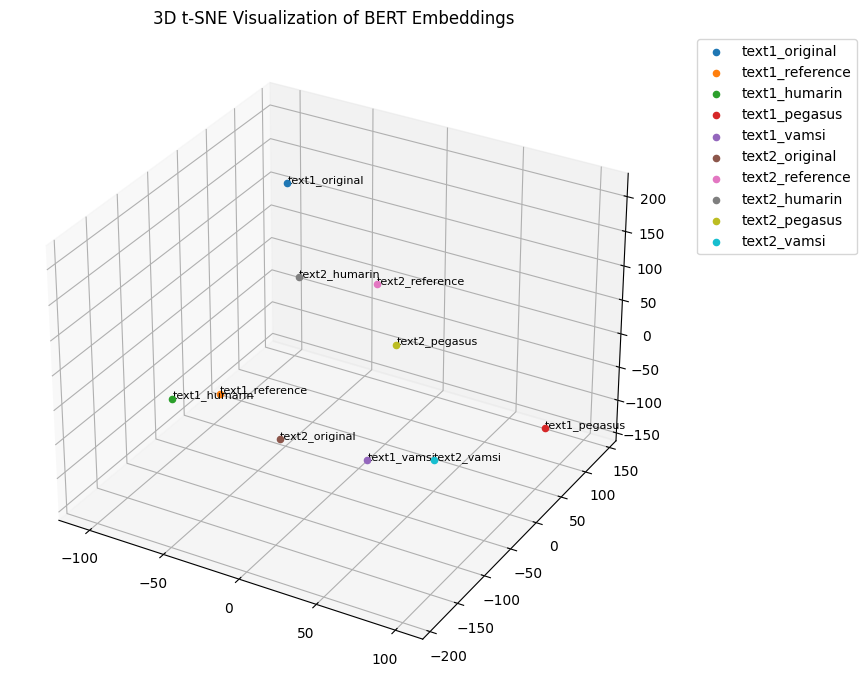

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

texts = {
    "text1_original": text1_versions["original"],
    "text1_reference": text1_versions["reference"],
    "text1_humarin":  text1_versions["humarin"],
    "text1_pegasus":  text1_versions["pegasus"],
    "text1_vamsi":    text1_versions["vamsi"],
    "text2_original": text2_versions["original"],
    "text2_reference": text2_versions["reference"],
    "text2_humarin":  text2_versions["humarin"],
    "text2_pegasus":  text2_versions["pegasus"],
    "text2_vamsi":    text2_versions["vamsi"],
}

#Φόρτωση tokenizer + μοντέλου BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
model.eval().to("cpu")

#Συνάρτηση υπολογισμού embeddings (mean pooling)
def get_embedding(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, max_length=512)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

#Υπολογισμός embeddings
labels = []
vectors = []

for name, text in texts.items():
    emb = get_embedding(text)
    labels.append(name)
    vectors.append(emb)

vectors = np.array(vectors)

#PCA + t-SNE
pca = PCA(n_components=5).fit_transform(vectors)
tsne = TSNE(n_components=3, perplexity=5, init='pca', learning_rate='auto', random_state=42).fit_transform(pca)

#Οπτικοποίηση 3D
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

for i, label in enumerate(labels):
    ax.scatter(tsne[i, 0], tsne[i, 1], tsne[i, 2], label=label)
    ax.text(tsne[i, 0], tsne[i, 1], tsne[i, 2], label, fontsize=8)

ax.set_title("3D t-SNE Visualization of BERT Embeddings")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
